In [30]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go


sns.set_context("talk")
plt.style.use('ggplot')
mpl.rcParams['axes.labelpad']='30'

In [66]:
df_drinks = pd.read_csv("../datos/drinks_solution.csv")
df_drinks = df_drinks.loc[:,["country", "total_litres_of_pure_alcohol"]]
df_drinks = df_drinks.set_index("country")
df_drinks = df_drinks.rename(index={"USA": 'United States'})
df_drinks.head()

,total_litres_of_pure_alcohol
country,
Afghanistan,0.0
Albania,4.9
Algeria,0.7
Andorra,12.3
Angola,5.7


In [67]:
df_life = pd.read_csv("../datos/life_expectancy.csv")
df_life = df_life.loc[:,["Country Name", "Country Code", "2017"]]
df_life = df_life.set_index("Country Name")
df_life.head()

,Country Code,2017
Country Name,,
Aruba,ABW,76.010
Afghanistan,AFG,64.130
Angola,AGO,60.379
Albania,ALB,78.333
Andorra,AND,NaN


In [144]:
df_life_alcohol = df_life.join(df_drinks)
df_life_alcohol = df_life_alcohol.rename(columns={"2017": "life expectancy"})
# df_life_alcohol = df_life_alcohol.loc[["Rwanda", "Colombia", "United States"],:]
df_life_alcohol = df_life_alcohol.reset_index()
df_life_alcohol = df_life_alcohol.rename(columns={"life expectancy": 'le',
                                                  'total_litres_of_pure_alcohol':'alcohol',
                                                  'Country Name': 'nombre'})
df_life_alcohol

,nombre,Country Code,le,alcohol
0,Aruba,ABW,76.010000,NaN
1,Afghanistan,AFG,64.130000,0.0
2,Angola,AGO,60.379000,5.7
3,Albania,ALB,78.333000,4.9
4,Andorra,AND,NaN,12.3
...,...,...,...,...
259,Kosovo,XKX,71.946341,NaN
260,"Yemen, Rep.",YEM,66.086000,NaN
261,South Africa,ZAF,63.538000,6.8
262,Zambia,ZMB,63.043000,1.0


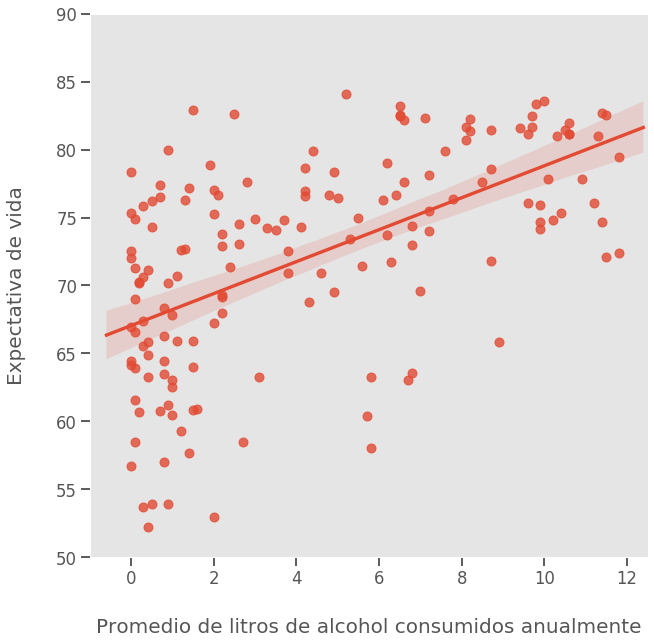

In [146]:
plt.figure(figsize=(10,10))

ax = sns.regplot(x="alcohol", y="le", data=df_life_alcohol)
# ax = sns.scatterplot(x="alcohol", y="le", data=df_life_alcohol)
ax.set_xlabel("Promedio de litros de alcohol consumidos anualmente",fontsize=20)
ax.set_ylabel("Expectativa de vida",fontsize=20)
ax.set_xlim(-1, 12.5)
ax.set_ylim(50, 90)
ax.grid(False)

# for line in range(0,df_life_alcohol.shape[0]):
#      ax.text(df_life_alcohol.loc[line,"alcohol"]+0.2, df_life_alcohol.loc[line,"le"], df_life_alcohol.loc[line,'nombre'], horizontalalignment='left', size='xx-large', color='black', weight='semibold')


# x - 12.5
# y - 90

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


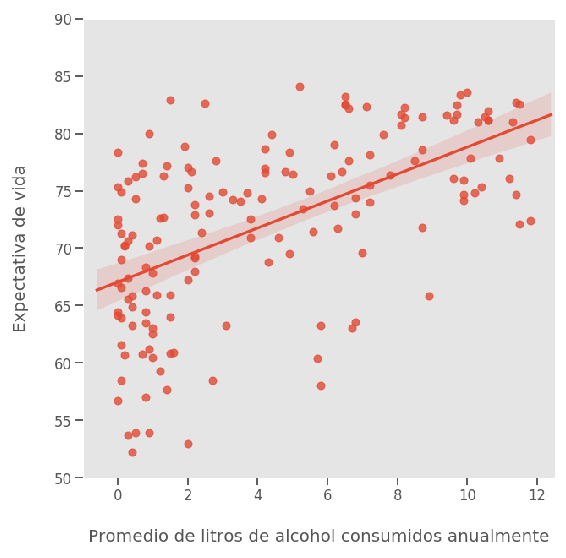

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image as mpimg

fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.grid(b=None)
nombres_imagenes = ["rwanda.png", "rw_col.png", "rw_col_usa.png", "todos.png", "todos_tendencia.png"]
ims = []
for dir_imagen in nombres_imagenes:
    im=plt.imshow(mpimg.imread(mypath + '/' + dir_imagen))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1500, blit=True,repeat_delay=4000)

ani.save('../outputs/drink_life.html')

plt.show()